In [1]:
!pip install lightgbm

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn import metrics


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [3]:
df=pd.read_csv("/content/Titanic_train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [5]:
from sklearn.impute import SimpleImputer
numeric_cols=['Age']

 # Separate non-numeric columns
non_numeric_cols = ['Cabin', 'Embarked']

# Create an imputer for numeric data
imputer_numeric = SimpleImputer(strategy='mean')

# Apply the imputer to numeric columns
df[numeric_cols] = imputer_numeric.fit_transform(df[numeric_cols])

# Create an imputer for non-numeric data
imputer_cat = SimpleImputer(strategy='most_frequent')
 # Apply the imputer to non-numeric columns
df[non_numeric_cols] = imputer_cat.fit_transform(df[non_numeric_cols])


In [6]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [7]:
df['Sex']=df['Sex'].map({"male":0,"female":1})
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,C148,C


In [8]:
x=df.drop(['Embarked','PassengerId','Name','Ticket','Cabin'],axis=1)
x

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.000000,1,0,7.2500
1,1,1,1,38.000000,1,0,71.2833
2,1,3,1,26.000000,0,0,7.9250
3,1,1,1,35.000000,1,0,53.1000
4,0,3,0,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000
887,1,1,1,19.000000,0,0,30.0000
888,0,3,1,29.699118,1,2,23.4500
889,1,1,0,26.000000,0,0,30.0000


In [9]:
y=df['Embarked']
y

,Embarked
0,S
1,C
2,S
3,S
4,S
...,...
886,S
887,S
888,S
889,C


In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [11]:
model=lgb.LGBMClassifier(learning_rate=0.05,max_depth=5,random_state=42)
model.fit(x_train,y_train)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000159 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 187
[LightGBM] [Info] Number of data points in the train set: 623, number of used features: 7
[LightGBM] [Info] Start training from score -1.734066
[LightGBM] [Info] Start training from score -2.427213
[LightGBM] [Info] Start training from score -0.307677
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

LGBMClassifier(learning_rate=0.05, max_depth=5, random_state=42)

In [12]:
y_pred=model.predict(x_test)
y_pred

array(['C', 'S', 'S', 'S', 'C', 'C', 'Q', 'S', 'Q', 'S', 'S', 'S', 'S',
       'C', 'S', 'C', 'S', 'Q', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'Q', 'S', 'Q', 'S', 'S', 'S', 'Q', 'S',
       'S', 'S', 'S', 'S', 'Q', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'C',
       'S', 'S', 'Q', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'Q',
       'S', 'S', 'S', 'C', 'C', 'S', 'S', 'S', 'S', 'S', 'S', 'Q', 'S',
       'S', 'S', 'S', 'S', 'S', 'Q', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'Q', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'C', 'S',
       'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'C', 'S', 'C', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'C', 'S', 'S', 'S', 'S', 'C', 'C', 'S',
       'Q', 'C', 'S', 'S', 'C', 'C', 'C', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'Q', 'S', 'S',
       'S', 'Q', 'S', 'Q', 'C', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'C', 'S', 'C', 'S', 'S', 'S', 'S', 'S

In [13]:
y_test

,Embarked
709,C
439,S
840,S
720,S
39,C
...,...
821,S
633,S
456,S
500,S


In [14]:
train_data=x_train,y_train
test_data=x_test,y_test

In [15]:
print(train_data)

(     Survived  Pclass  Sex        Age  SibSp  Parch      Fare
445         1       1    0   4.000000      0      2   81.8583
650         0       3    0  29.699118      0      0    7.8958
172         1       3    1   1.000000      1      1   11.1333
450         0       2    0  36.000000      1      2   27.7500
314         0       2    0  43.000000      1      1   26.2500
..        ...     ...  ...        ...    ...    ...       ...
106         1       3    1  21.000000      0      0    7.6500
270         0       1    0  29.699118      0      0   31.0000
860         0       3    0  41.000000      2      0   14.1083
435         1       1    1  14.000000      1      2  120.0000
102         0       1    0  21.000000      0      1   77.2875

[623 rows x 7 columns], 445    S
650    S
172    S
450    S
314    S
      ..
106    S
270    S
860    S
435    S
102    S
Name: Embarked, Length: 623, dtype: object)


In [16]:
test_data

(     Survived  Pclass  Sex        Age  SibSp  Parch     Fare
 709         1       3    0  29.699118      1      1  15.2458
 439         0       2    0  31.000000      0      0  10.5000
 840         0       3    0  20.000000      0      0   7.9250
 720         1       2    1   6.000000      0      1  33.0000
 39          1       3    1  14.000000      1      0  11.2417
 ..        ...     ...  ...        ...    ...    ...      ...
 821         1       3    0  27.000000      0      0   8.6625
 633         0       1    0  29.699118      0      0   0.0000
 456         0       1    0  65.000000      0      0  26.5500
 500         0       3    0  17.000000      0      0   8.6625
 430         1       1    0  28.000000      0      0  26.5500
 
 [268 rows x 7 columns],
 709    C
 439    S
 840    S
 720    S
 39     C
       ..
 821    S
 633    S
 456    S
 500    S
 430    S
 Name: Embarked, Length: 268, dtype: object)

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

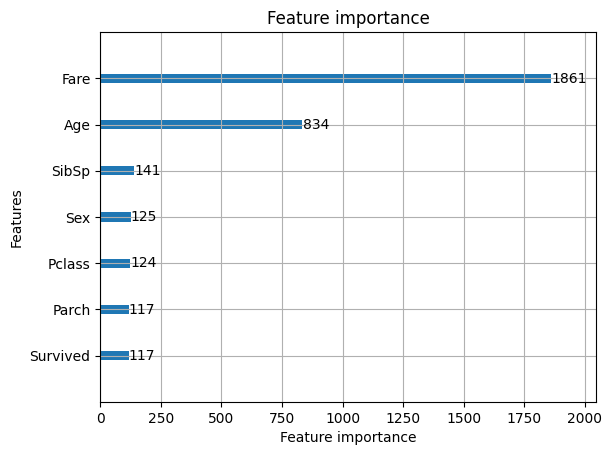

In [17]:
lgb.plot_importance(model)


<Figure size 1000x600 with 0 Axes>

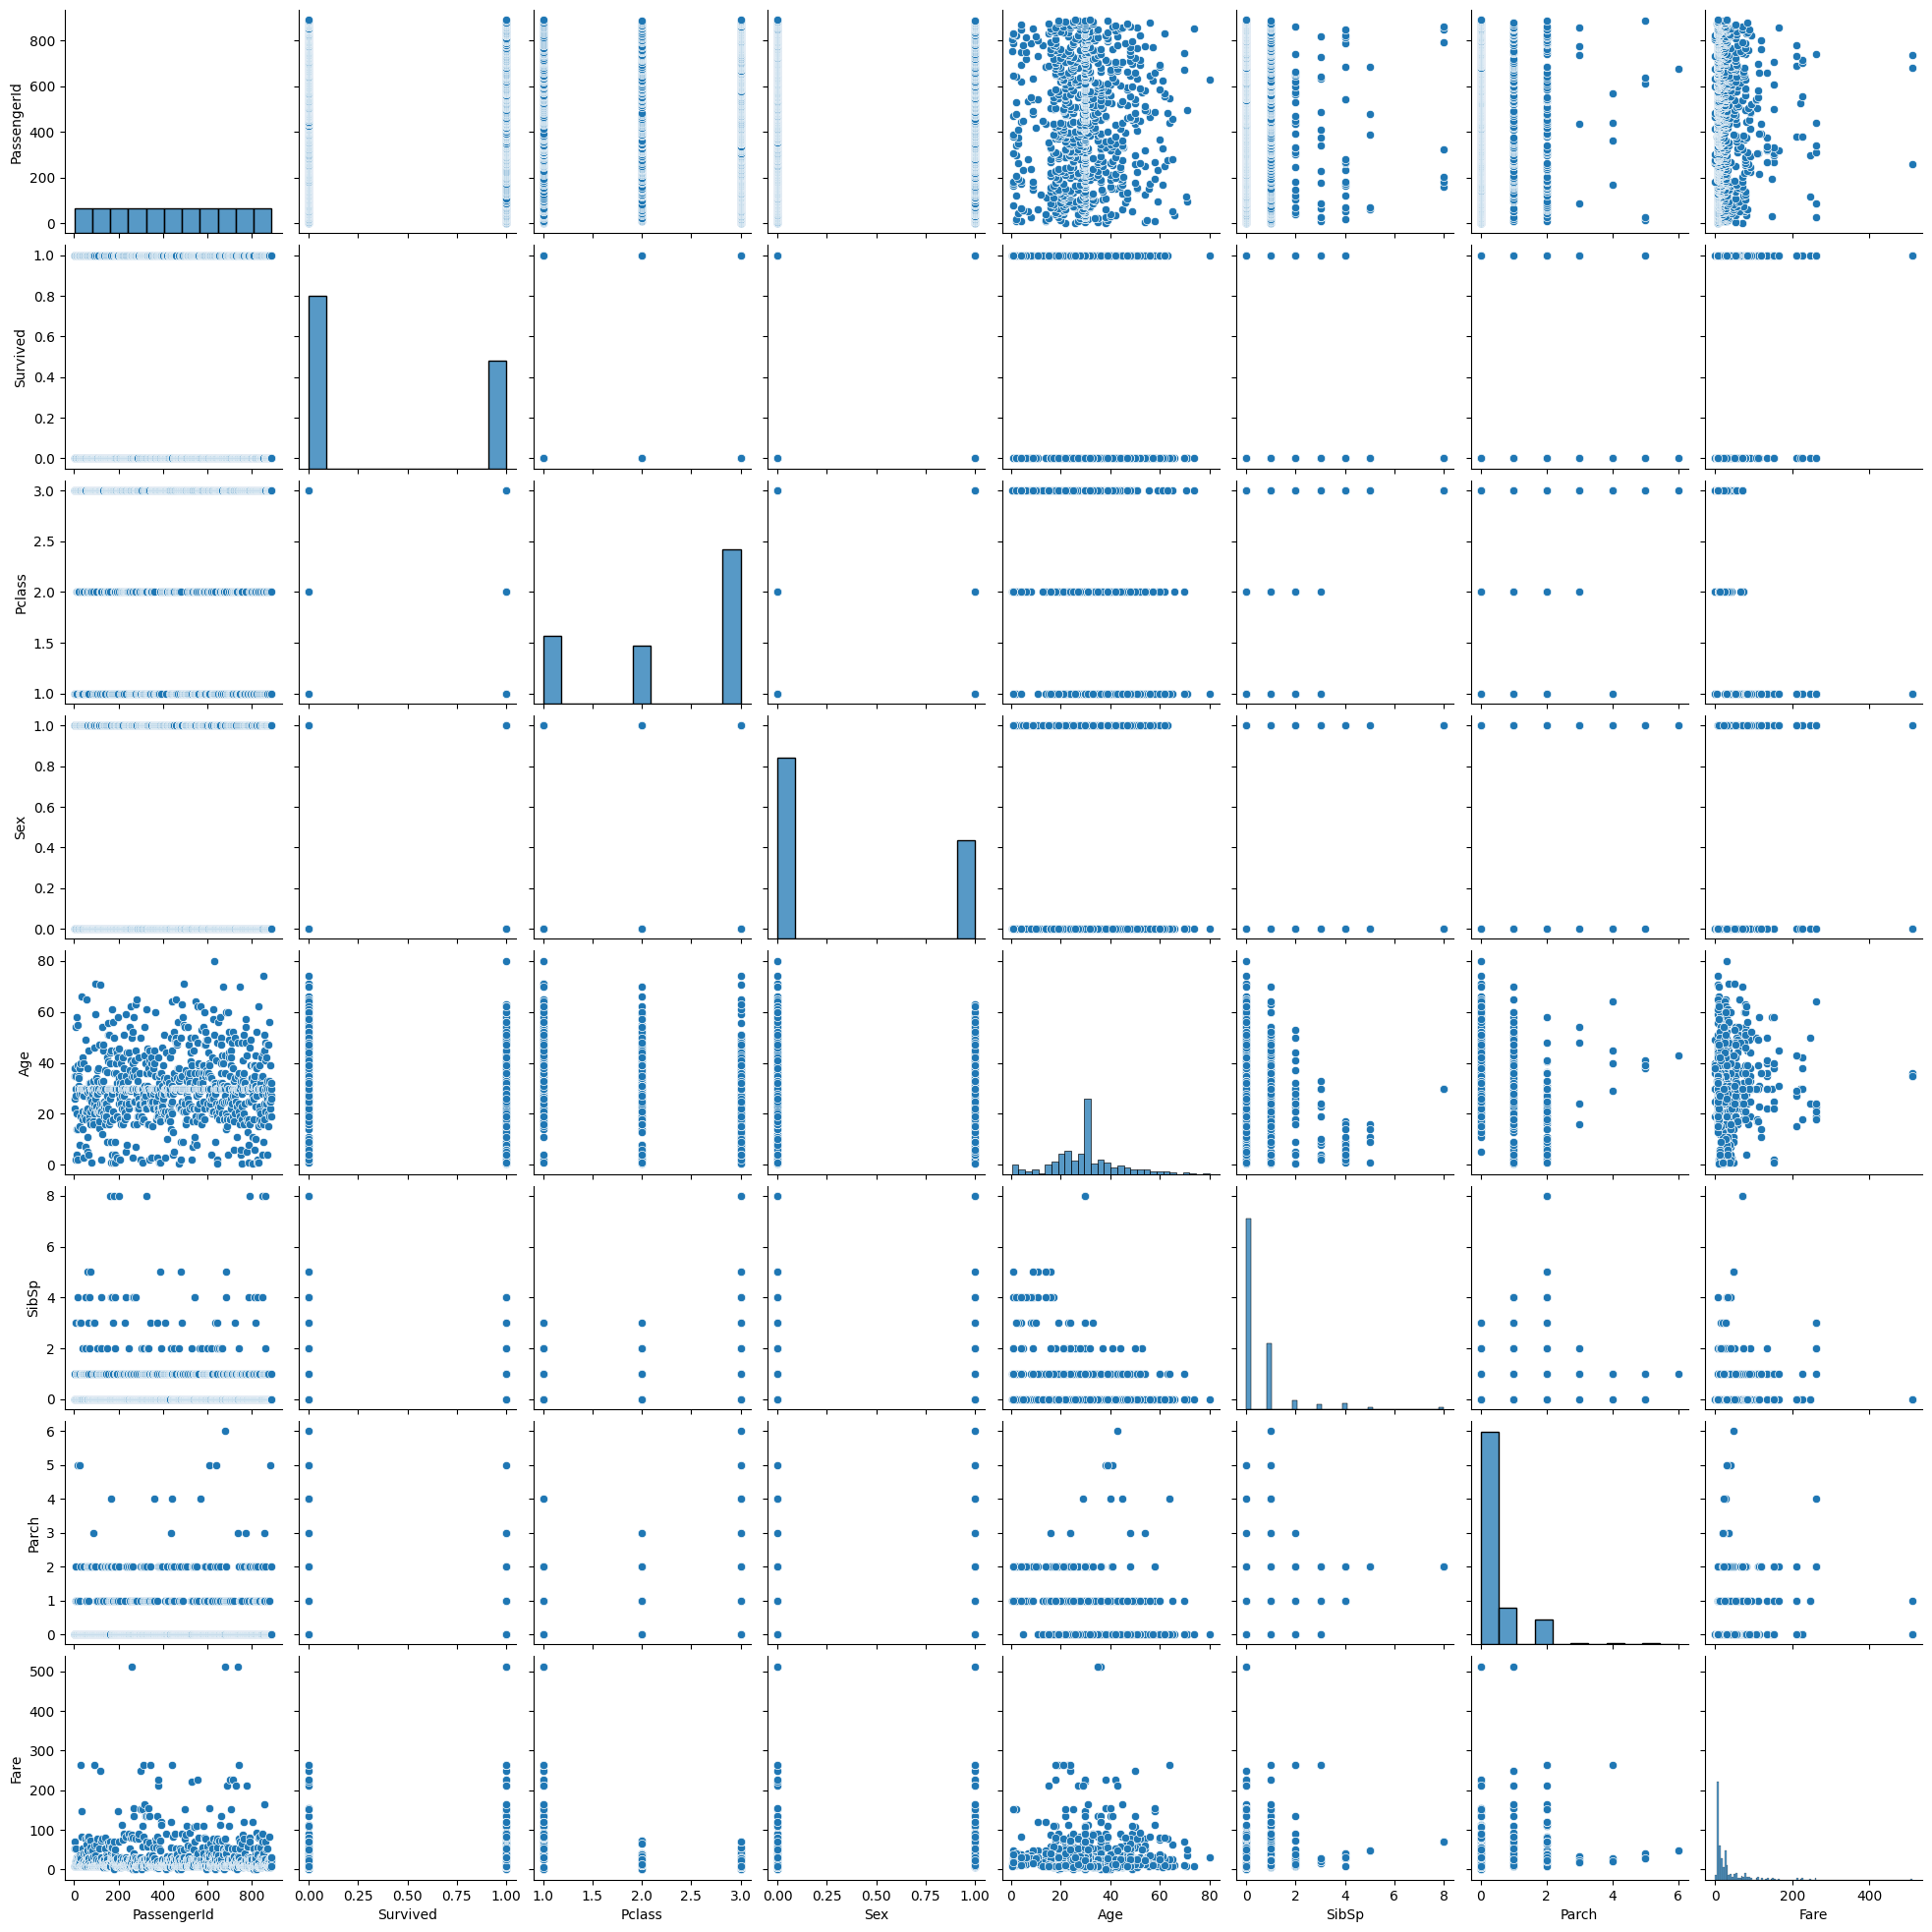

In [18]:
plt.figure(figsize=(10,6))

sns.pairplot(data=df)
plt.show()

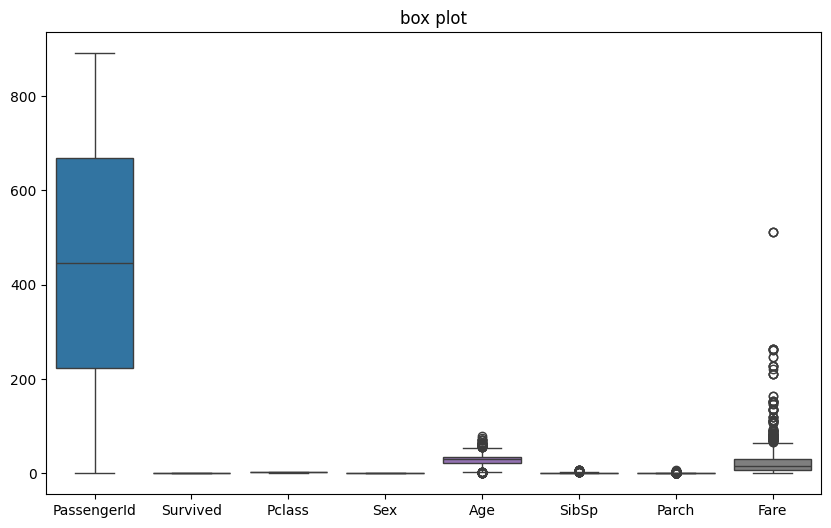

In [19]:
plt.figure(figsize=(10,6))

sns.boxplot(data=df)
plt.title('box plot')
plt.show()

In [20]:
#remove outliers
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df = df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)]
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,B96 B98,S
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,B96 B98,S
5,6,0,3,"Moran, Mr. James",0,29.699118,0,0,330877,8.4583,B96 B98,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,C148,C


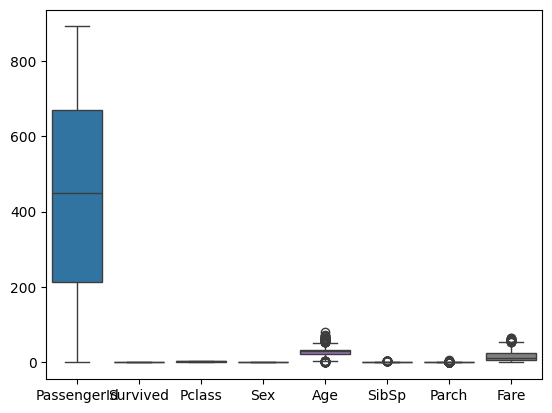

In [21]:
sns.boxplot(data=df)
plt.show()

In [22]:
print('accuracy {:.4f}'.format(model.score(x_train,y_train)))

accuracy 0.9213


In [23]:
print('accuracy {:.4f}'.format(model.score(x_test,y_test)))

accuracy 0.7948
